<a href="https://colab.research.google.com/github/pragnavi/Machine-Learning/blob/master/pr2370_MLFall_22_Lec6_Optimization_in_Class_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In-Class Exercise

Try to a build a simple optimizer to minimize:
$f(w) = a[0]*w^d + a[1]*w^(d-1) + ... + a[d]$
    

for the coefficients `a = [1,0,-2,0.5,0]`


*  Plot the function f(w)
*  Can you see where the minima is?
*  Write a function that outputs f(w) and its gradient.
*  Test the gradient
*  Run the optimizer on the function to see if it finds the minima.
*  Print the funciton value and number of iterations.

Bonus: Instead of writing the function for a specific coefficient vector a, create a class that works for an arbitrary vector a.
You may wish to use the `np.polyval(a,x)` method to evaluate the polynomial.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

**Plotting the function f(w) vs w**

In [ ]:
a = np.array([1,0,-2,0.5,0])
d = a.size
w0 = random.random()
hist = {'w': [], 'f': []}
f0 = 0

Local Minima is encountered at w =  1


Text(0.5, 0, 'w')

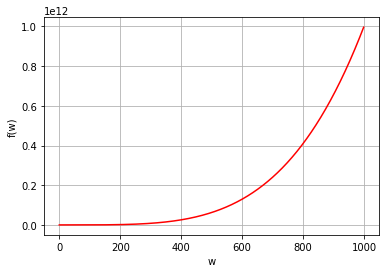

In [ ]:
for w in range(1000):
  wt = np.empty(a.size)
  for i in range(d):
    wt[i] = pow(w,(d-i-1))
  f = a.dot(wt)
  hist['f'].append(f)
  hist['w'].append(w)
print("Local Minima is encountered at w = ", np.argmin(hist['f']))
plt.plot(hist['w'],hist['f'],'r')
plt.grid("True")
plt.ylabel("f(w)")
plt.xlabel("w")

**Minima**
It looks like a local minima is encounterd at w = 1, f(w) = -0.5 and the function is increasing thereafter.

**Function & Gradient Evaluation**

In [ ]:
def feval(w,a):

  d = a.size
  f = 0
  fgrad = 0
  w0 = np.empty(a.size)
  for i in range(d):
    w0[i] = pow(w,(d-i-1))
  f = a.dot(w0)

  #Gradient
  w0 = np.empty(a.size)
  for i in range(d):
    w0[i] = (d-i-1)*pow(w,(d-i-2))
  fgrad = a.dot(w0)

  return f, fgrad

In [ ]:
feval_param = lambda w: feval(w,a)

**Testing the gradient**

In [ ]:
# Initial condition
w0 = random.random()

# Perturb the point
step = 1e-6
w1 = w0 + step*random.random()

# Measure the function and gradient at w0 and w1
f0, fgrad0 = feval_param(w0)
f1, fgrad1 = feval_param(w1)

# Predict the amount the function should have changed based on the gradient
df_est = fgrad0*(w1-w0)

# Print the two values to see if they are close
print("Actual f1-f0    = %12.4e" % (f1-f0))
print("Predicted f1-f0 = %12.4e" % df_est)

Actual f1-f0    =  -9.4629e-08
Predicted f1-f0 =  -9.4629e-08


**A Simple Gradient Descent Optimizer**

In [ ]:
def grad_opt_simp(feval, winit, lr=1e-3,nit=1000):
    """
    Simple gradient descent optimization

    feval:  A function that returns f, fgrad, the objective
            function and its gradient
    winit:  Initial estimate
    lr:     learning rate
    nit:    Number of iterations
    """
    # Initialize
    w0 = winit

    # Create history dictionary for tracking progress per iteration.
    # This isn't necessary if you just want the final answer, but it
    # is useful for debugging
    hist = {'w': [], 'f': []}

    # Loop over iterations
    for it in range(nit):

        # Evaluate the function and gradient
        f0, fgrad0 = feval(w0)

        # Take a gradient step
        w0 = w0 - lr*fgrad0

         # Save history
        hist['f'].append(f0)
        hist['w'].append(w0)

    # Convert to numpy arrays
    for elem in ('f', 'w'):
        hist[elem] = np.array(hist[elem])
    return w0, f0, hist

In [ ]:
# Initial condition
winit = random.random()

# Parameters
feval = feval
nit = 1000
lr = 1e-4

# Run the gradient descent
w, f0, hist = grad_opt_simp(feval_param, winit, lr=lr, nit=nit)

print("Function Value:", f0)
print("Number of iterations:",len(hist['f']))

Function Value: 0.006471669457286125
Number of iterations: 1000


**A class that works for an arbitrary vector a**

In [ ]:
class LogisticFun(object):
  def __init__(self,a):
    self.a = a

  def feval(self,w):
    f = np.polyval(self.a,w)

    #Gradient
    d = self.a.size
    w0 = np.empty(self.a.size)
    for i in range(d):
      w0[i] = (d-i-1)*pow(w,(d-i-2))
    fgrad = self.a.dot(w0)

    return f, fgrad

In [ ]:
n = random.randint(0, 100)
a = np.random.randn(n)
log_fun = LogisticFun(a)

# Initial condition
w0 = random.random()

# Perturb the point
step = 1e-6
w1 = w0 + step*random.random()

f0, fgrad0 = log_fun.feval(w0)
f1, fgrad1 = log_fun.feval(w1)

# Predict the amount the function should have changed based on the gradient
df_est = fgrad0*(w1-w0)

# Print the two values to see if they are close
print("Actual f1-f0    = %12.4e" % (f1-f0))
print("Predicted f1-f0 = %12.4e" % df_est)

Actual f1-f0    =  -5.2786e-07
Predicted f1-f0 =  -5.2786e-07
